# Data Cleaning and EDA

Here we will take a closer look at the posts we have collected from TheSilphRoad and pokemongo subreddits.  

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
# import status data
silph_df = pd.read_csv('../data/silph.csv')
pogo_df = pd.read_csv('../data/pogo.csv')

In [3]:
silph_df.head()

,selftext,title,subreddit
0,Has anybody found a permanent fix to not being...,Fix to not being able to attack?,TheSilphRoad
1,2 raids today where my attacks wouldn’t regist...,Attack glitch during Regi raids,TheSilphRoad
2,I’ve had a Pokémon defending a gym for over 36...,[Bug?] Can’t seem to earn or collect pokecoins...,TheSilphRoad
3,"Using an iPhone 11, so it is not an old phone ...",[Bug?] AR suddenly freezes,TheSilphRoad
4,For any data nerds I wanted to give my persona...,3 hour incense event personal results,TheSilphRoad


In [4]:
pogo_df.head()

,selftext,title,subreddit
0,Should I power up my 1103 cp charmeleon to 116...,Pokemon evolution question regarding cp potent...,pokemongo
1,I live in an empty area with a decent amount o...,Im mad and just got scammed...,pokemongo
2,I need to get sunkern or exeggcute for the mel...,Need help in getting sunkern/ exeggcute,pokemongo
3,My girlfriend recently got the Samsung Note 20...,Weird new glitch,pokemongo
4,"i dont live in range of a gym, just one pokest...",pokestops by me,pokemongo


In [5]:
silph_df = silph_df.astype(str)
pogo_df = pogo_df.astype(str)

In [6]:
# check lengths of selftext and title
silph_df['selftext_word_length'] = [len(RegexpTokenizer(r"[\w'-]+").tokenize(i)) for i in silph_df['selftext']]
silph_df['title_word_length'] = [len(RegexpTokenizer(r"[\w'-]+").tokenize(i)) for i in silph_df['title']]
silph_df.head()

,selftext,title,subreddit,selftext_word_length,title_word_length
0,Has anybody found a permanent fix to not being...,Fix to not being able to attack?,TheSilphRoad,16,7
1,2 raids today where my attacks wouldn’t regist...,Attack glitch during Regi raids,TheSilphRoad,44,5
2,I’ve had a Pokémon defending a gym for over 36...,[Bug?] Can’t seem to earn or collect pokecoins...,TheSilphRoad,36,13
3,"Using an iPhone 11, so it is not an old phone ...",[Bug?] AR suddenly freezes,TheSilphRoad,120,4
4,For any data nerds I wanted to give my persona...,3 hour incense event personal results,TheSilphRoad,142,6


In [7]:
pogo_df['selftext_word_length'] = [len(RegexpTokenizer(r"[\w'-]+").tokenize(i)) for i in pogo_df['selftext']]
pogo_df['title_word_length'] = [len(RegexpTokenizer(r"[\w'-]+").tokenize(i)) for i in pogo_df['title']]
pogo_df.head()

,selftext,title,subreddit,selftext_word_length,title_word_length
0,Should I power up my 1103 cp charmeleon to 116...,Pokemon evolution question regarding cp potent...,pokemongo,32,9
1,I live in an empty area with a decent amount o...,Im mad and just got scammed...,pokemongo,143,6
2,I need to get sunkern or exeggcute for the mel...,Need help in getting sunkern/ exeggcute,pokemongo,25,6
3,My girlfriend recently got the Samsung Note 20...,Weird new glitch,pokemongo,95,3
4,"i dont live in range of a gym, just one pokest...",pokestops by me,pokemongo,62,3


In [8]:
pogo_df.describe()

,selftext_word_length,title_word_length
count,8701.000000,8701.000000
mean,63.383634,7.298701
std,85.732012,5.657613
min,1.000000,1.000000
25%,31.000000,4.000000
50%,46.000000,6.000000
75%,71.000000,9.000000
max,4898.000000,62.000000


In [9]:
silph_df.describe()

,selftext_word_length,title_word_length
count,10683.000000,10683.000000
mean,90.162314,8.925115
std,267.365512,6.213454
min,0.000000,1.000000
25%,24.000000,5.000000
50%,45.000000,7.000000
75%,82.000000,11.000000
max,6650.000000,61.000000


In [10]:
# remove 2000+ word sob stories
silph_df = silph_df.loc[silph_df['selftext_word_length'] < 2000]
pogo_df = pogo_df.loc[pogo_df['selftext_word_length'] < 2000]

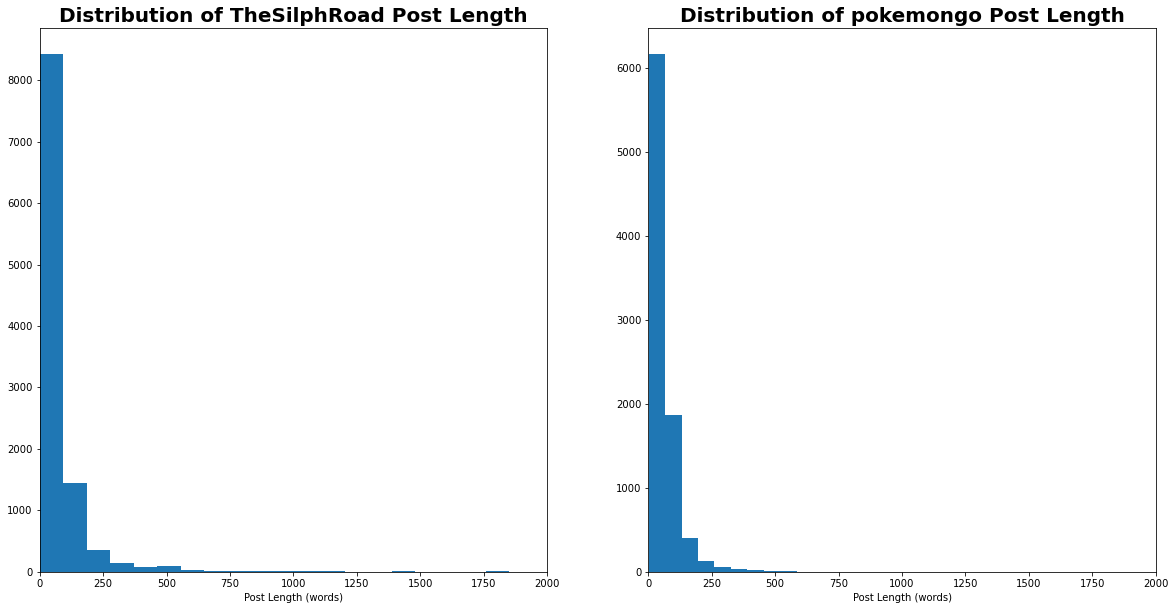

In [11]:
# plot the distribution of word length for self-text between the two subreddits
fig, ax = plt.subplots(1,2, figsize = (20, 10))
ax[0].hist(silph_df['selftext_word_length'], bins = 20)
ax[0].set_xlim(0, 2000)
ax[0].set_xlabel('Post Length (words)')
ax[0].set_title('Distribution of TheSilphRoad Post Length', fontsize = 20, fontweight = 'bold')
ax[1].hist(pogo_df['selftext_word_length'], bins = 20)
ax[1].set_xlim(0, 2000)
ax[1].set_xlabel('Post Length (words)')
ax[1].set_title('Distribution of pokemongo Post Length', fontsize = 20, fontweight = 'bold');

Here we can see that most posts are short in text which we expected after looking at our summary statistics above. 

In [12]:
# merge together title and selftext
silph_df['merged_text'] = silph_df['title'] + ' ' + silph_df['selftext']
pogo_df['merged_text'] = pogo_df['title'] + ' ' + pogo_df['selftext']

## Checking word counts on the 2 Subreddits

In [13]:
# create a custom stop words list to remove obvious words that will help determine one of these two subreddits

# start with the base english stopwords
new_stopwords = stopwords.words('english')

# add stopwords that will easily identify a silph post, we do not worry about making ones for the pokemongo as both subreddits are related to pokemongo
custom_words = ['silph', 'road', 'silphroad']

new_stopwords.extend(custom_words)

In [14]:
# initialize CountVectorizer

cvec_pogo = CountVectorizer(stop_words = new_stopwords, strip_accents = 'unicode')
cvec_silph = CountVectorizer(stop_words = new_stopwords, strip_accents = 'unicode')
X_pogo = pogo_df['selftext']

X_pogo = cvec_pogo.fit_transform(X_pogo)
pogo_selftext = pd.DataFrame(X_pogo.todense(), columns = cvec_pogo.get_feature_names())

# list the 15 most common words on pokemongo subreddit
pogo_selftext.sum().sort_values(ascending = False).head(15)

pokemon    5172
get        3291
one        2420
like       1946
go         1870
know       1820
would      1749
shiny      1693
game       1684
anyone     1532
time       1454
got        1357
raid       1252
day        1238
level      1235
dtype: int64

In [15]:
X_silph = silph_df['selftext']

X_silph = cvec_silph.fit_transform(X_silph)
silph_selftext = pd.DataFrame(X_silph.todense(), columns = cvec_silph.get_feature_names())

# list the 15 most common words on TheSilphRoad subreddit
silph_selftext.sum().sort_values(ascending = False).head(15)

pokemon    6269
get        3600
one        2909
like       2515
would      2472
https      2260
mega       2162
raid       2134
go         2130
time       2095
game       2072
amp        2045
know       1979
com        1924
new        1758
dtype: int64

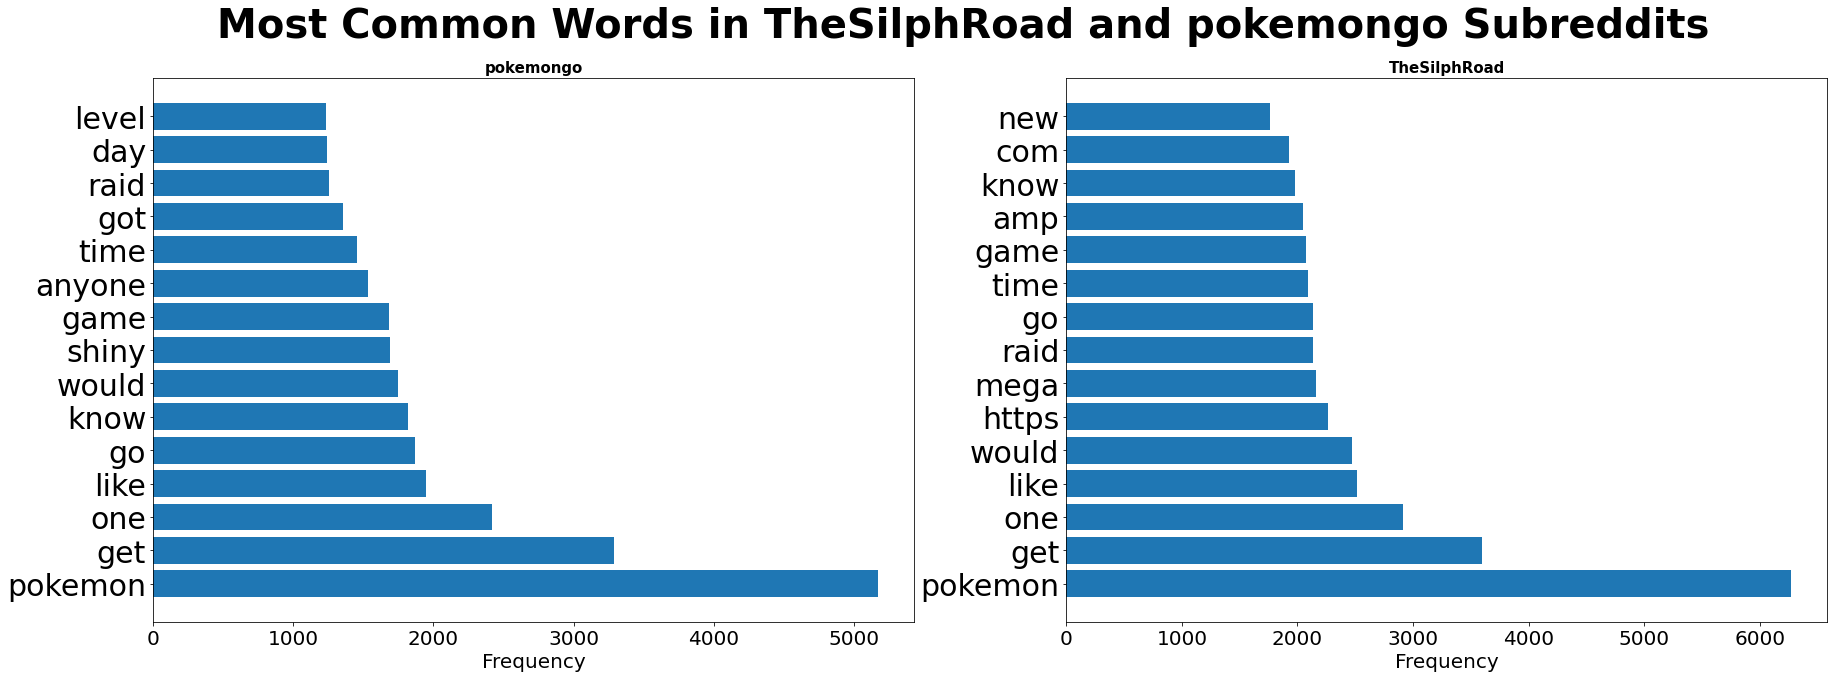

In [16]:
# plot the most common words on bar charts

fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax[0].barh(pogo_selftext.sum().sort_values(ascending = False).head(15).index, pogo_selftext.sum().sort_values(ascending = False).head(15))
ax[0].set_title('pokemongo', fontsize = 15, fontweight = 'bold')
ax[1].barh(silph_selftext.sum().sort_values(ascending = False).head(15).index, silph_selftext.sum().sort_values(ascending = False).head(15))
ax[1].set_title('TheSilphRoad', fontsize = 15, fontweight = 'bold')
for axes in ax:
    axes.set_xlabel('Frequency', fontsize = 20)
    axes.yaxis.set_tick_params(labelsize = 30)
    axes.xaxis.set_tick_params(labelsize = 20)
fig.suptitle('Most Common Words in TheSilphRoad and pokemongo Subreddits', fontsize = 40, fontweight = 'bold');

Here we see that the most common words are very similar between TheSilphRoad and pokemongo subreddit. We will do more cleaning in future notebooks to find words that will distinguish the 2 subreddits more clearly. 

In [17]:
# merge silph and pokemongo subreddits

merged_df = pd.concat([silph_df, pogo_df], axis = 0)
merged_df.head()

,selftext,title,subreddit,selftext_word_length,title_word_length,merged_text
0,Has anybody found a permanent fix to not being...,Fix to not being able to attack?,TheSilphRoad,16,7,Fix to not being able to attack? Has anybody f...
1,2 raids today where my attacks wouldn’t regist...,Attack glitch during Regi raids,TheSilphRoad,44,5,Attack glitch during Regi raids 2 raids today ...
2,I’ve had a Pokémon defending a gym for over 36...,[Bug?] Can’t seem to earn or collect pokecoins...,TheSilphRoad,36,13,[Bug?] Can’t seem to earn or collect pokecoins...
3,"Using an iPhone 11, so it is not an old phone ...",[Bug?] AR suddenly freezes,TheSilphRoad,120,4,"[Bug?] AR suddenly freezes Using an iPhone 11,..."
4,For any data nerds I wanted to give my persona...,3 hour incense event personal results,TheSilphRoad,142,6,3 hour incense event personal results For any ...


In [18]:
merged_df.shape

(19344, 6)

In [19]:
merged_df.drop(columns = ['selftext_word_length', 'title_word_length', 'selftext', 'title'], axis = 1, inplace = True)

In [20]:
merged_df.to_csv('../data/merged.csv', index = False)